In [ ]:
%%capture
%pip install tensorflow

In [ ]:
import numpy as np

from tensorflow.keras.datasets import mnist


In [ ]:
# Функция визуализации обущающей выборки
import matplotlib.pyplot as plt

def visualise_images(x_data, y_data, num_images = 10):
  plt.figure(figsize=(12, 6))

  for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_data[i].reshape(28, 28), cmap='gray')
    plt.title(f'Класс: {y_data[i]}')
    plt.axis('off')

  plt.tight_layout()
  plt.show()

In [ ]:
# Обучающая выборка
(x_train, y_train), (x_test, y_test) = mnist.load_data()

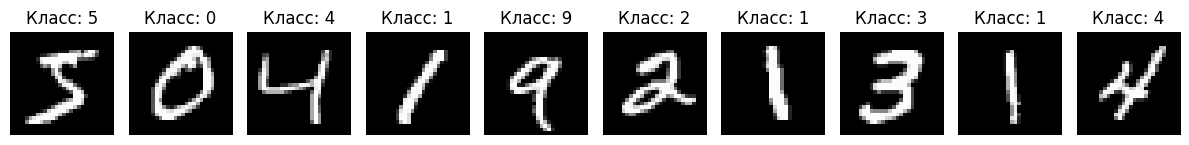

In [ ]:
visualise_images(x_train, y_train)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
# Нормализация входных данных

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 256
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 256

In [ ]:
# Преобразование тестовых денных классов

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


Модель свёрточной нейронной сети

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 134s 351ms/step - accuracy: 0.7814 - loss: 0.6814 - val_accuracy: 0.9773 - val_loss: 0.0732
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 128s 342ms/step - accuracy: 0.9687 - loss: 0.1068 - val_accuracy: 0.9851 - val_loss: 0.0501
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 138s 333ms/step - accuracy: 0.9803 - loss: 0.0671 - val_accuracy: 0.9886 - val_loss: 0.0397
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 138s 323ms/step - accuracy: 0.9846 - loss: 0.0542 - val_accuracy: 0.9887 - val_loss: 0.0404
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 148s 338ms/step - accuracy: 0.9869 - loss: 0.0445 - val_accuracy: 0.9865 - val_loss: 0.0442
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 136s 323ms/step - accuracy: 0.9886 - loss: 0.0401 - val_accuracy: 0.9912 - val_loss: 0.0339
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 121s 322ms/step - accuracy: 0.9897 - loss: 0.0327 - val_accuracy: 0.9911 - val_loss: 0.0361
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 144s 326ms/step - accuracy: 0.9901 -

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Точность на тестовых данных {test_accuracy:.2%}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9906 - loss: 0.0316
Точность на тестовых данных 99.22%


In [ ]:
def predict(model, img):
  input_img = np.expand_dims(img, axis=0)

  prediction = model.predict(input_img, verbose=0)
  predict_label = np.argmax(prediction)
  confidence = np.max(prediction)

  plt.imshow(input_img.reshape(28, 28), cmap='gray')
  plt.title(f'Класс: {predict_label} точность: {confidence:.2%}')
  plt.axis('off')
  plt.show()

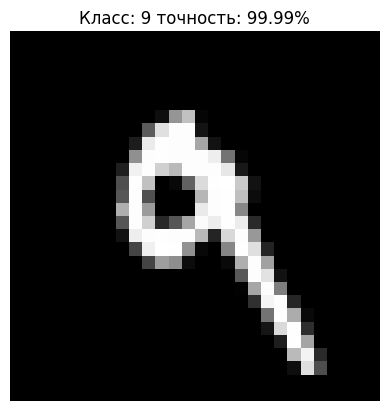

In [ ]:
 predict(model, x_test[7])

In [ ]:
# обработка собственных изображений

from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Предобработк изображения
def PreProcessingImage(path):
  img = load_img(path, color_mode='grayscale', target_size=(28,28))
  img_array = img_to_array(img)

  img_array = 255 - img_array # инверсия цветов - фон чёрный
  img_array = img_array.astype('float32') / 255 # нормировка

  img_array = np.expand_dims(img_array, axis=0)
  return img_array

def CustomPredict(model, path):
  img = PreProcessingImage(path)
  prediction = model.predict(img, verbose=0)

  predict_class = np.argmax(prediction)
  confidence = np.max(prediction)

  return predict_class, confidence


In [ ]:
img_path = 'test.png'
digit, conf = CustomPredict(model, img_path)
print(f"В файле {img_path} изображена цифра {digit} с вероятностью {conf}")

В файле test.png изображена цифра 4 с вероятностью 0.9807054400444031
